In [26]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [27]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [28]:
NUM_CLASSES = 4

# 学習データ読み込み

In [29]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [30]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [33]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [35]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [36]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/4 [======>.......................] - ETA: 2s - loss: 1.4240 - accuracy: 0.1953
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 1s 64ms/step - loss: 1.4119 - accuracy: 0.2579 - val_loss: 1.3305 - val_accuracy: 0.3043
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.3454 - accuracy: 0.3047
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 1.3420 - accuracy: 0.3187 - val_loss: 1.2971 - val_accuracy: 0.3696
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2904 - accuracy: 0.3359
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 1.3248 - accuracy: 0.3236 - val_loss: 1.2677 - val_accuracy: 0.4855
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2948 - accuracy: 0.2969
Epoch 4: saving model to 

c:\Users\Owner\Documents\GitHub\hand-gesture-recognition-mediapipe\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 19ms/step - loss: 1.3080 - accuracy: 0.3041 - val_loss: 1.2402 - val_accuracy: 0.4783
Epoch 5/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2816 - accuracy: 0.3984
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 1.2868 - accuracy: 0.3552 - val_loss: 1.2142 - val_accuracy: 0.5072
Epoch 6/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2255 - accuracy: 0.4688
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 1.2691 - accuracy: 0.4112 - val_loss: 1.1905 - val_accuracy: 0.5362
Epoch 7/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2312 - accuracy: 0.4219
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 1.2392 - accuracy: 0.4282 - val_loss: 1.1674 -

In [37]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.4936 - accuracy: 0.8043


In [38]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [39]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 55ms/step
[5.9444021e-04 3.6018897e-05 4.4519803e-01 5.5417150e-01]
3


# 混同行列

5/5 [==============================] - 0s 2ms/step


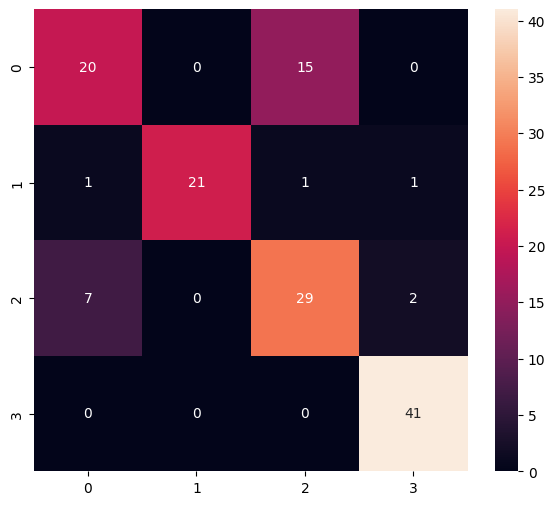

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.57      0.63        35
           1       1.00      0.88      0.93        24
           2       0.64      0.76      0.70        38
           3       0.93      1.00      0.96        41

    accuracy                           0.80       138
   macro avg       0.82      0.80      0.81       138
weighted avg       0.81      0.80      0.80       138



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [41]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

c:\Users\Owner\Documents\GitHub\hand-gesture-recognition-mediapipe\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Owner\AppData\Local\Temp\tmpskdl794v\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\AppData\Local\Temp\tmpskdl794v\assets


6572

# 推論テスト

In [43]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [44]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [45]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [46]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [47]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.9444056e-04 3.6018886e-05 4.4519818e-01 5.5417132e-01]
3
